In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

palette = sns.color_palette(palette='Dark2')

# NQ-Swap

In [28]:
nq_swap_results_df = pd.read_csv("../evaluation_results/nq_swap.csv")


In [25]:
def get_EM_line_plot(df, model_name: str, range_masked_heads: tuple = None):
    df = df.loc[df['model.name'] == model_name]
    print(df)

    df["decoder.configs.num_retrieval_heads"].fillna(0, inplace=True)  # For baseline models
    if any([head < 0 for head in range_masked_heads]):
        head_type = "Random Heads"
    else:
        head_type = "Retrieval Heads"

    if range_masked_heads:
        df = df.loc[(df['decoder.configs.num_retrieval_heads'] >= range_masked_heads[0]) & (df['decoder.configs.num_retrieval_heads'] <= range_masked_heads[1])]

    print(df)
    if any([head < 0 for head in range_masked_heads]):
        df["decoder.configs.num_retrieval_heads"] = df["decoder.configs.num_retrieval_heads"].apply(lambda x: -x if x < 0 else x)

    # Rename columns for plotting
    df.rename(columns={
        'decoder.configs.num_retrieval_heads': f'Num. Masked {head_type}',
        'org_EM': 'EM w.r.t original Answer',
        'sub_EM': 'EM w.r.t substituted answer'
    }, inplace=True)

    # Melt the DataFrame to have a long-form DataFrame suitable for seaborn
    df_melted = df.melt(id_vars=f'Num. Masked {head_type}', 
                        value_vars=['EM w.r.t original Answer', 'EM w.r.t substituted answer'],
                        var_name='Metric', value_name='EM Score')

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_melted, x=f'Num. Masked {head_type}', y='EM Score', hue='Metric', marker='o', palette=palette)

    # Add titles and labels
    plt.title(model_name)
    plt.xlabel(f'Num. Masked {head_type}')
    plt.ylabel('EM Score')

    # Show the plot
    plt.legend(title='Metric')

    plt.savefig(f"NQ_Swap_EM_{model_name}_masked_{head_type}.pdf", dpi=300, format='pdf')
    plt.show()

                                         Name     State  \
11     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
12     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
13     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
14     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
15     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
16     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
17     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
18     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
19     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
20     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
21  LLaMA3-8b__BaselineMaskedNonRetrievalHead  finished   
22  LLaMA3-8b__BaselineMaskedNonRetrievalHead  finished   
23  LLaMA3-8b__BaselineMaskedNonRetrievalHead  finished   
24  LLaMA3-8b__BaselineMaskedNonRetrievalHead  finished   
25  LLaMA3-8b__BaselineMaskedNonRetrievalHead  finished   
26                        LLaMA3-8b__Baseline  finished 

/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_37820/2379438470.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["decoder.configs.num_retrieval_heads"].fillna(0, inplace=True)  # For baseline models
/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_37820/2379438470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

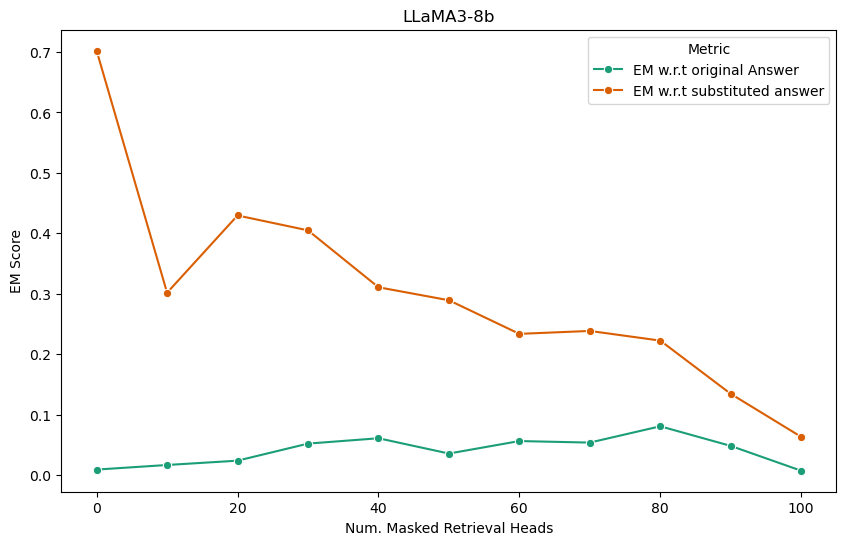

In [29]:
get_EM_line_plot(nq_swap_results_df, "LLaMA3-8b", range_masked_heads=(0, 100))

                                         Name     State  \
11     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
12     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
13     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
14     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
15     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
16     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
17     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
18     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
19     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
20     LLaMA3-8b__BaselineMaskedRetrievalHead  finished   
21  LLaMA3-8b__BaselineMaskedNonRetrievalHead  finished   
22  LLaMA3-8b__BaselineMaskedNonRetrievalHead  finished   
23  LLaMA3-8b__BaselineMaskedNonRetrievalHead  finished   
24  LLaMA3-8b__BaselineMaskedNonRetrievalHead  finished   
25  LLaMA3-8b__BaselineMaskedNonRetrievalHead  finished   
26                        LLaMA3-8b__Baseline  finished 

/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_37820/2379438470.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["decoder.configs.num_retrieval_heads"].fillna(0, inplace=True)  # For baseline models
/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_37820/2379438470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

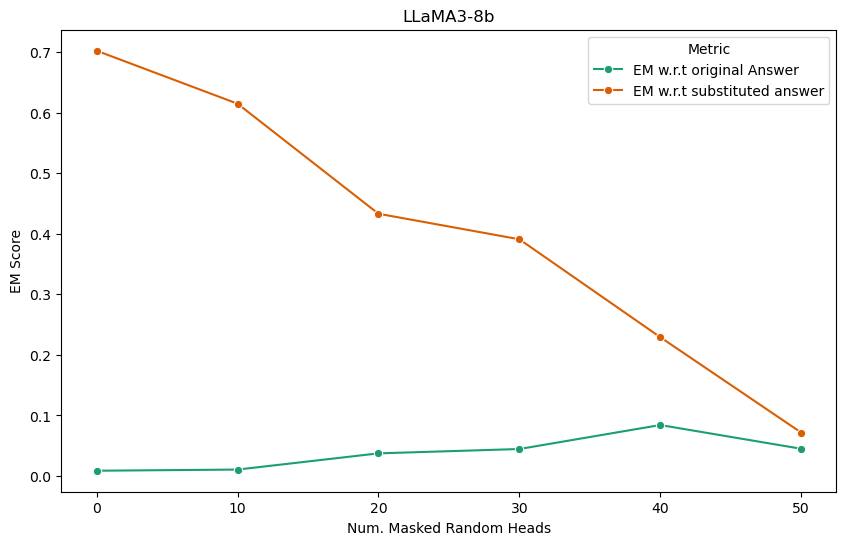

In [30]:
get_EM_line_plot(nq_swap_results_df, "LLaMA3-8b", range_masked_heads=(-100, 0))